In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r'c:/Users/Samarth/Desktop/Iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Changing categorical columns to numeric


In [7]:
data['Species'].replace(data['Species'].unique(),list(range(0,len(data['Species'].unique()))), inplace=True)

## Splitting data Set in X and Y


In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeClassifier
md=DecisionTreeClassifier()
md.fit(x_train,y_train)


DecisionTreeClassifier()

In [22]:
y_pred=md.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

[Text(2678.3999999999996, 2265.0, 'X[0] <= 100.5\ngini = 0.666\nsamples = 120\nvalue = [38, 40, 42]'),
 Text(1785.6, 1359.0, 'X[0] <= 50.5\ngini = 0.5\nsamples = 78\nvalue = [38, 40, 0]'),
 Text(892.8, 453.0, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(2678.3999999999996, 453.0, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(3571.2, 1359.0, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]')]

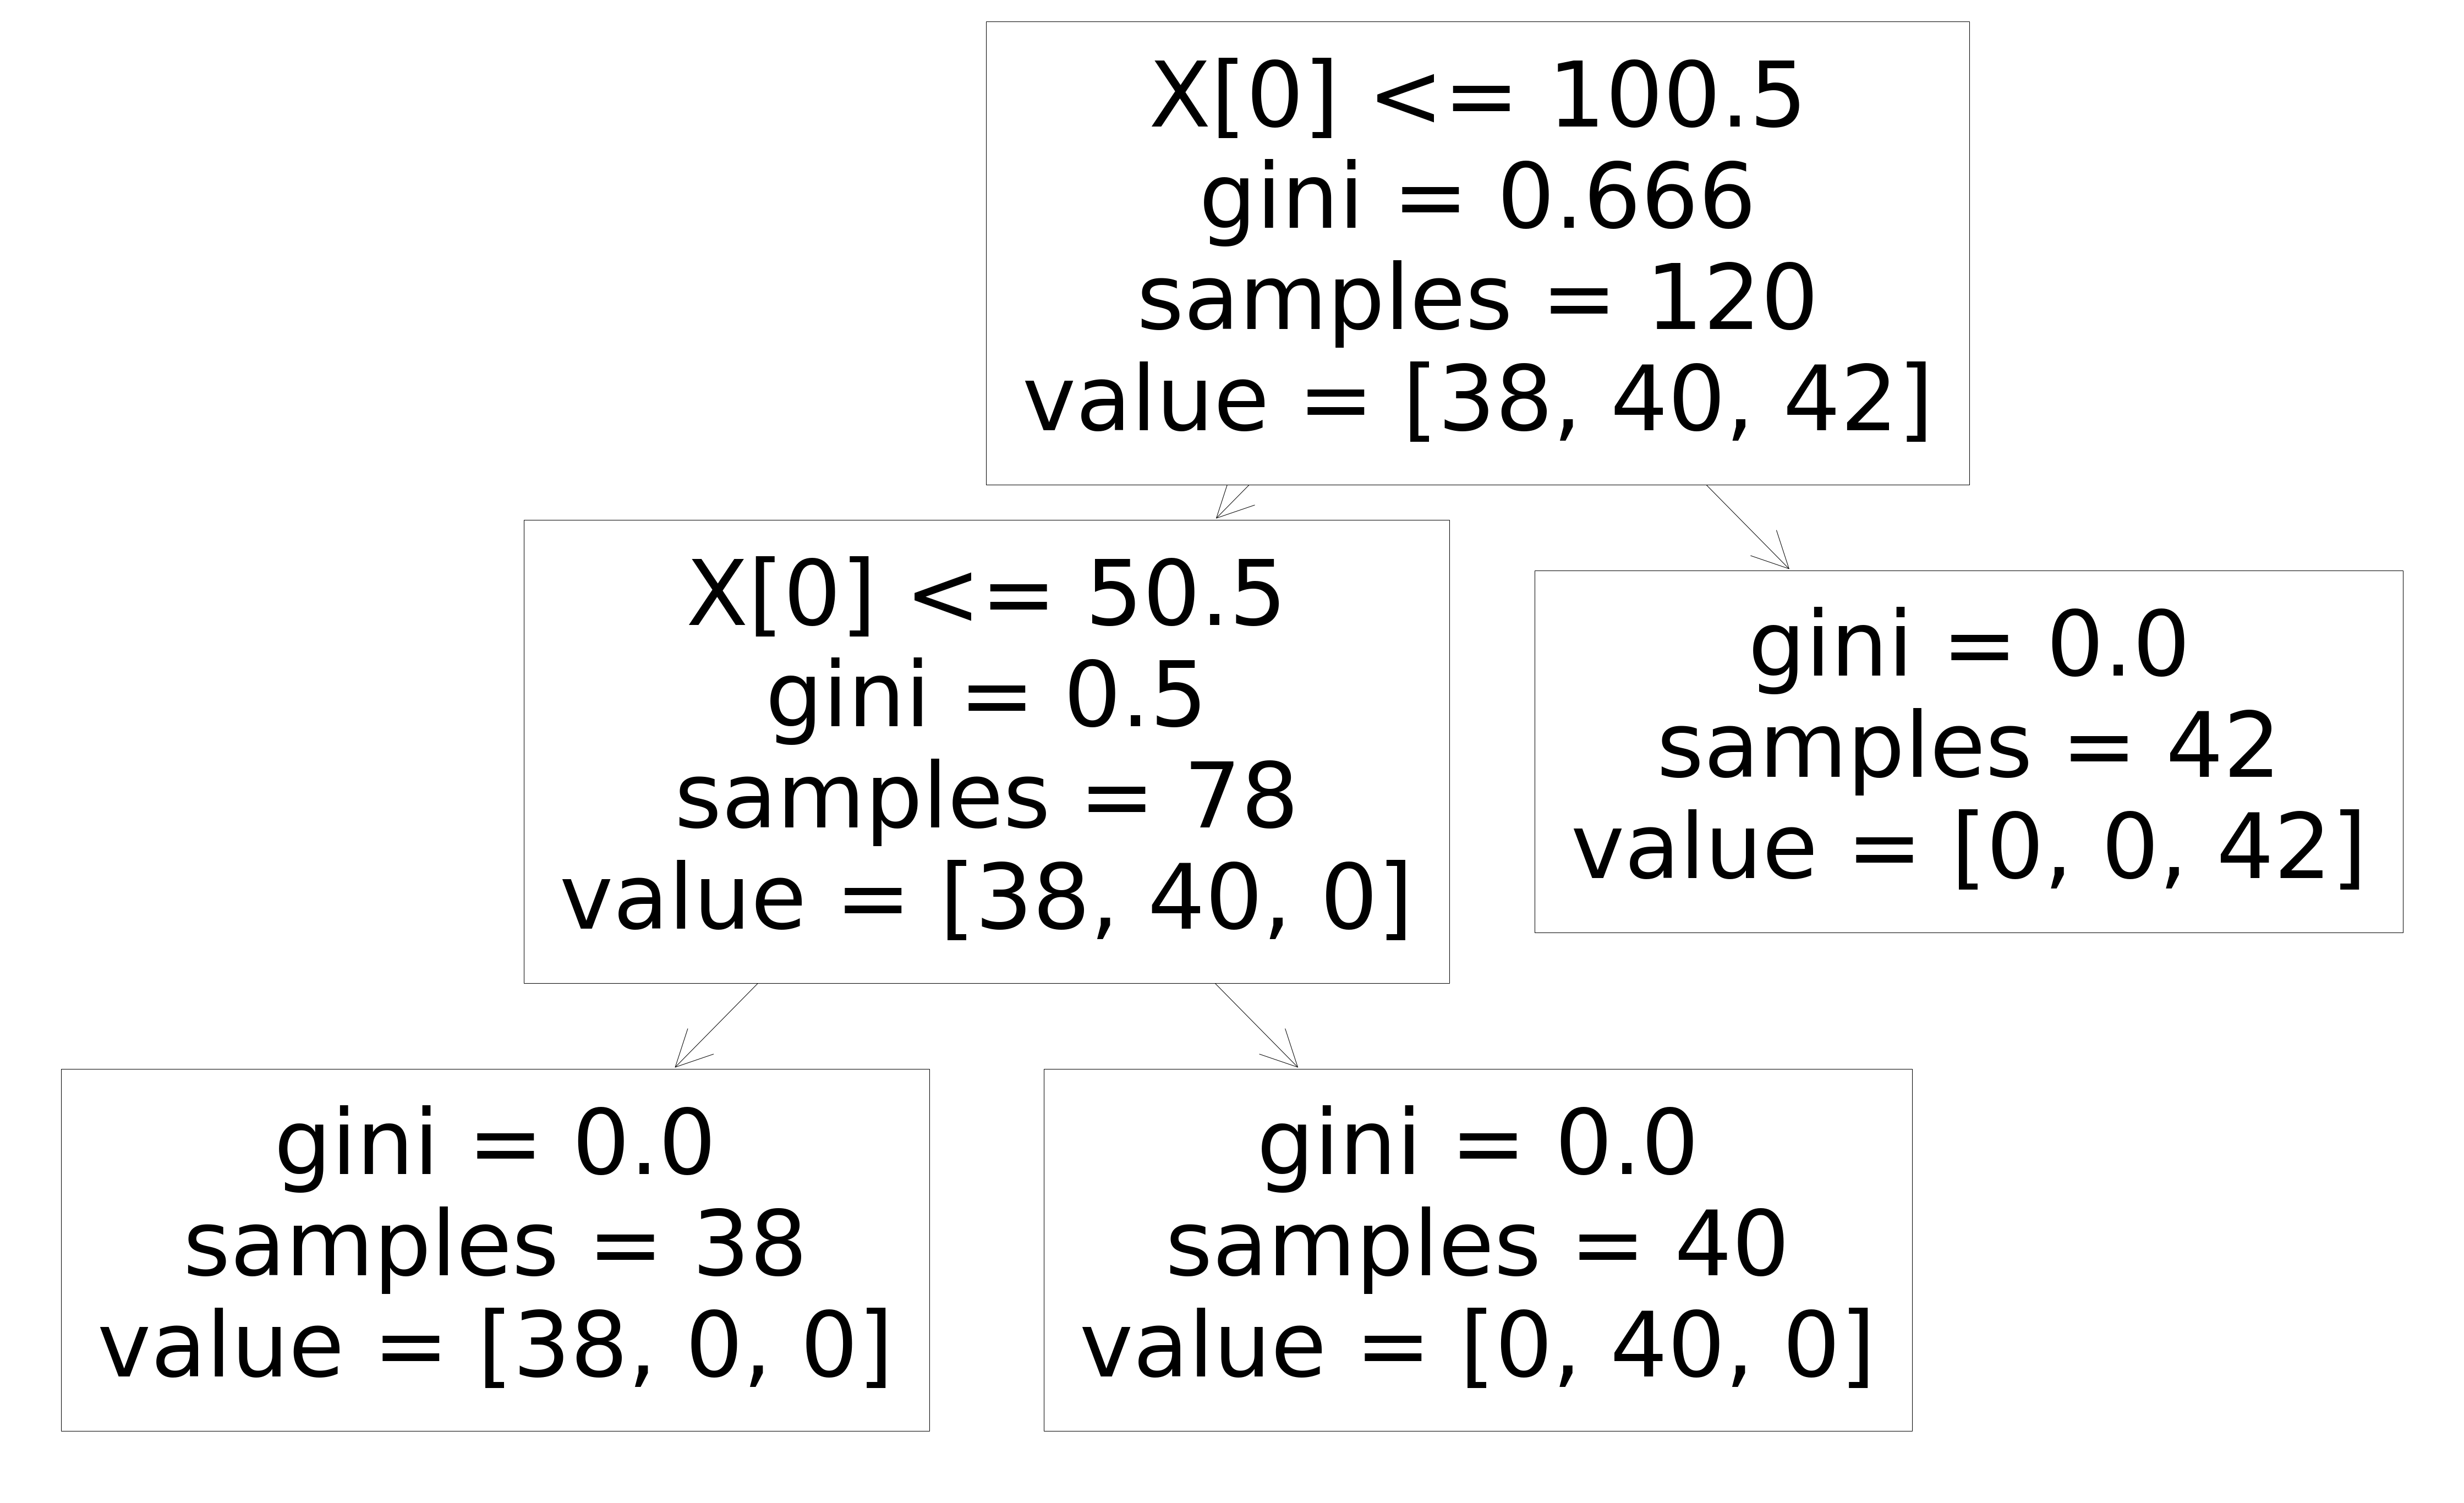

In [24]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(md)

## HyperParameter Tuning

In [25]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(x_train,y_train)
print(reg.best_params_)
print(reg.best_score_)

{'criterion': 'mse', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 0.5}
1.0


In [26]:
md=DecisionTreeClassifier(max_depth=2,max_features=1, min_samples_split=0.5)
md.fit(x_train,y_train)
y_pred=md.predict(x_test)
accuracy_score(y_test,y_pred)

0.9

[Text(1785.6, 2265.0, 'X[1] <= 5.45\ngini = 0.666\nsamples = 120\nvalue = [38, 40, 42]'),
 Text(892.8, 1359.0, 'gini = 0.224\nsamples = 39\nvalue = [34, 5, 0]'),
 Text(2678.3999999999996, 1359.0, 'X[0] <= 100.5\ngini = 0.542\nsamples = 81\nvalue = [4, 35, 42]'),
 Text(1785.6, 453.0, 'gini = 0.184\nsamples = 39\nvalue = [4, 35, 0]'),
 Text(3571.2, 453.0, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]')]

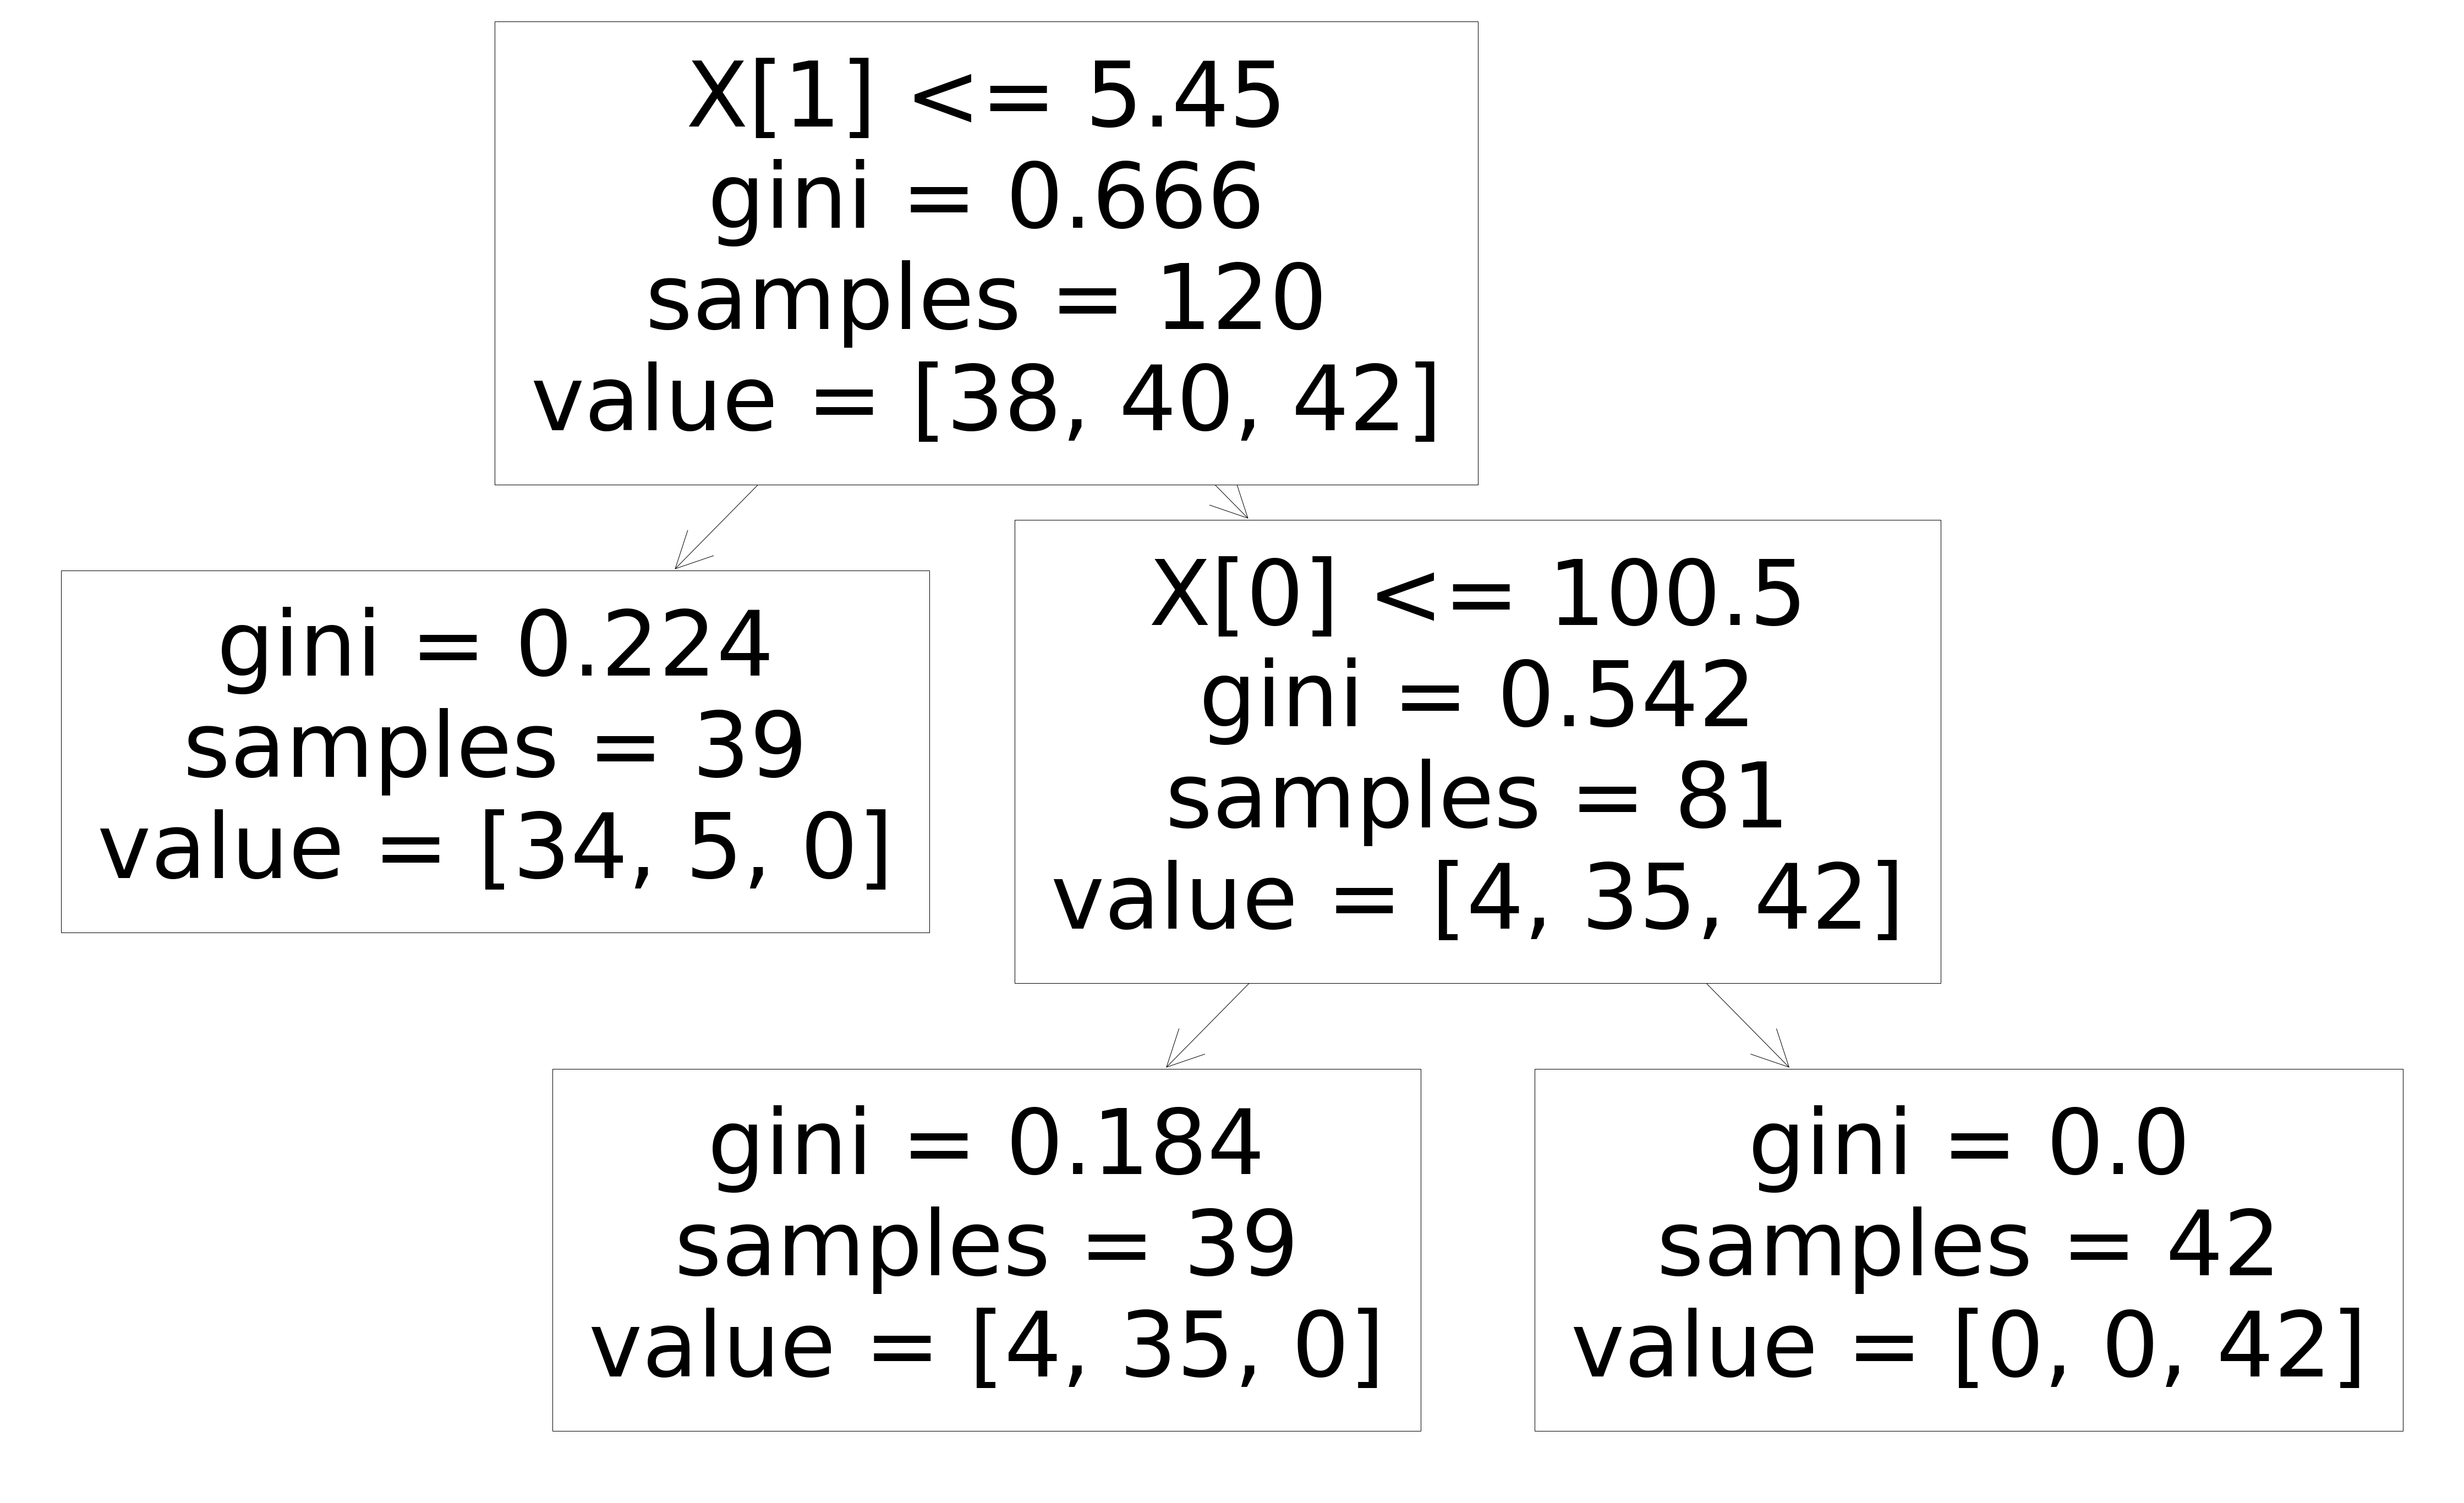

In [27]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(md)